# MIA attacks on Length-of-Stay predictor, Logistic Regression
## Installation of Packages in Conda

To install the required packages in your conda environment, you can use the following commands:

```bash
conda install h5py
conda install pytables


In [7]:
%reload_ext autoreload
%autoreload 2

In [16]:
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
sys.path.append(project_root)

from examples.mia.LOS.utils.data_processing import get_mimic_dataset, get_mimic_dataloaders
from examples.mia.LOS.utils.model_LR import MimicLR, create_trained_model_and_metadata


## Train the classifier
For the LR, the data should be flatten. So set the value to True for the LR model anb False for the GRU-D

In [12]:
# Generate the dataset and dataloaders
path = os.path.join(os.getcwd(), "data/")
flatten = True
dataset, train_indices, validation_indices, test_indices, early_stop_indices = get_mimic_dataset(path, train_frac = 0.5,
                                                                            test_frac= 0.2,
                                                                            validation_frac=0,
                                                                            early_stop_frac=0,
                                                                            flatten= flatten)

In [13]:
train_loader, validation_loader, test_loader, early_stop_loader = get_mimic_dataloaders(dataset,
                          train_indices,
                          validation_indices,
                          test_indices,
                          early_stop_indices,
                          batch_size=128)

In [17]:
n_features = dataset.x.shape[1]
print(f"Number of features: {n_features}")

model = MimicLR(n_features)
train_acc, train_loss, test_acc, test_loss = create_trained_model_and_metadata(model, 
                                                                               train_loader, 
                                                                               test_loader, 
                                                                               lr = 0.0001,
                                                                                weight_decay = 5.392,
                                                                               epochs=20)

Number of features: 7488


Training Progress: 100%|██████████| 20/20 [00:22<00:00,  1.12s/it]


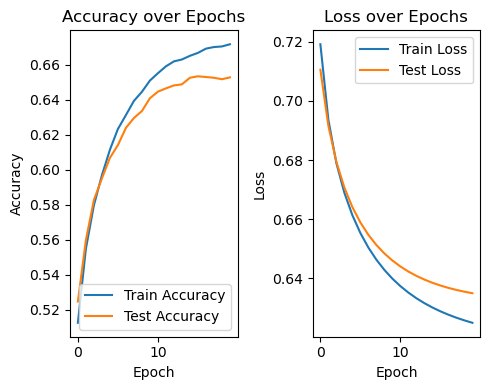

In [18]:
import matplotlib.pyplot as plt

# Plot training and test accuracy
plt.figure(figsize=(5, 4))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(test_acc, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

# Plot training and test loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

## Attack the LR model


In [19]:
from mimic_LR_handler.py import MimicInputHandler

from leakpro import LeakPro

# Read the config file
config_path = "audit.yaml"

# Prepare leakpro object
leakpro = LeakPro(MimicInputHandler, config_path)

# Run the audit 
leakpro.run_audit()

2024-12-10 14:08:51,648 INFO     Target model blueprint created from MimicLR in utils/model.py.
2024-12-10 14:08:51,655 INFO     Loaded target model metadata from ./target_LR/model_metadata.pkl
2024-12-10 14:08:51,657 INFO     Loaded target model from ./target_LR
2024-12-10 14:08:52,191 INFO     Loaded population dataset from ./data/flattened/dataset.pkl
2024-12-10 14:08:52,192 INFO     Loaded population dataset from ./data/flattened/dataset.pkl
2024-12-10 14:08:52,192 INFO     Creating shadow model handler singleton
2024-12-10 14:08:52,196 INFO     Created folder ./leakpro_output/attack_objects/shadow_model
2024-12-10 14:08:52,197 INFO     Creating distillation model handler singleton
2024-12-10 14:08:52,201 INFO     Created folder ./leakpro_output/attack_objects/distillation_model
2024-12-10 14:08:52,202 INFO     Configuring RMIA attack
2024-12-10 14:08:52,203 INFO     Added attack: rmia
2024-12-10 14:08:52,203 INFO     Preparing attack: rmia
2024-12-10 14:08:52,204 INFO     Preparin

No existing file named './leakpro_output/results/rmia/results.txt'. A new file will be created.


2024-12-10 14:09:40,973 INFO     Auditing completed


<Figure size 640x480 with 0 Axes>